<h1 align="center" style="background-color:DodgerBlue;">Desafío - Clasificación desde la econometría</h1>

* Para realizar este desafío debes haber estudiado previamente todo el material disponibilizado correspondiente a la unidad.
* Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
* Desarrollo desafío:
  * El desafío se debe desarrollar de manera Individual.
  * Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío - Clasificación desde la econometría.

### Descripción
En esta sesión trabajaremos el dataset south african heart, el cual contiene las siguientes variables:
* sbp: Presión Sanguínea Sistólica.
* tobacco: Promedio tabaco consumido por día.
* ldl: Lipoproteína de baja densidad.
* adiposity: Adiposidad.
* famhist: Antecedentes familiares de enfermedades cardiácas. (Binaria)
* types: Personalidad tipo A
* obesity: Obesidad.
* alcohol: Consumo actual de alcohol.
* age: edad.
* chd: Enfermedad coronaria. (dummy)

#### Desafío 1: Preparar el ambiente de trabajo
* Cargue las librerías básicas para importación y manipulación de datos (numpy, pandas), gráficos (matplotlib y seaborn) y de modelación econométrica (statsmodels).
* Importe el archivo southafricanheart.csv que se encuentra dentro del material de apoyo.
* Realice una descripción del set importado mostrando:
  * lista con los nombres de variables importadas
  * un análisis descriptivo mediante .describe()
  * Distribución de categorías para las variables famhist y chd.



In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Importamos la triada clásica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# seaborn
import seaborn as sns
# scipy stats para simular
import scipy.stats as stats
# statsmodels para modelación
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn') # Gráficos estilo seaborn
# plt.rcParams["figure.figsize"] = (6, 3) # Tamaño gráficos
# plt.rcParams["figure.dpi"] = 200 # resolución gráficos

In [3]:
df = pd.read_csv('southafricanheart.csv')
df.drop(columns = ['Unnamed: 0'], inplace=True)
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [5]:
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [6]:
df.rename(columns = {'chd':'OBJETIVO'}, inplace=True)

<AxesSubplot:>

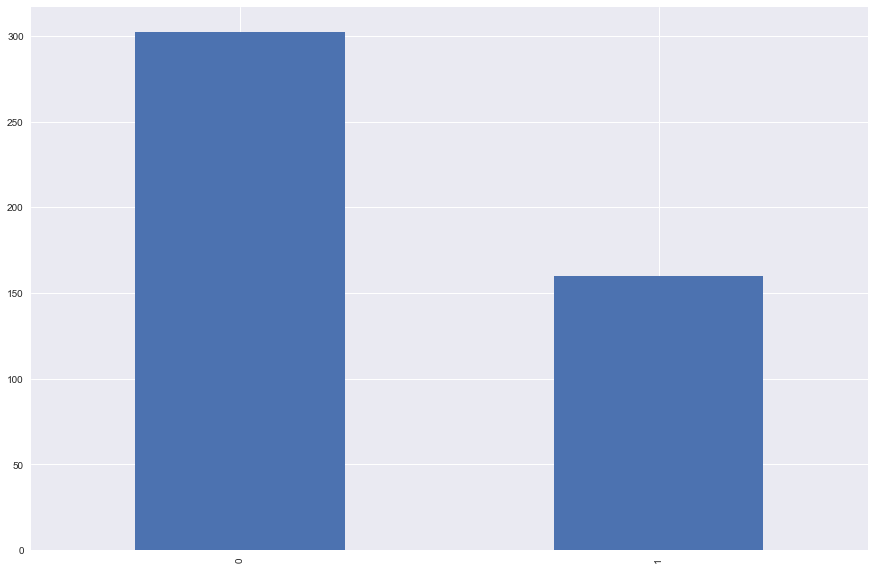

In [7]:
plt.figure(figsize=(15,10))
df.OBJETIVO.value_counts().plot(kind= 'bar')

In [8]:
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,OBJETIVO
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [9]:
df['famhist'].value_counts()

Absent     270
Present    192
Name: famhist, dtype: int64

<AxesSubplot:>

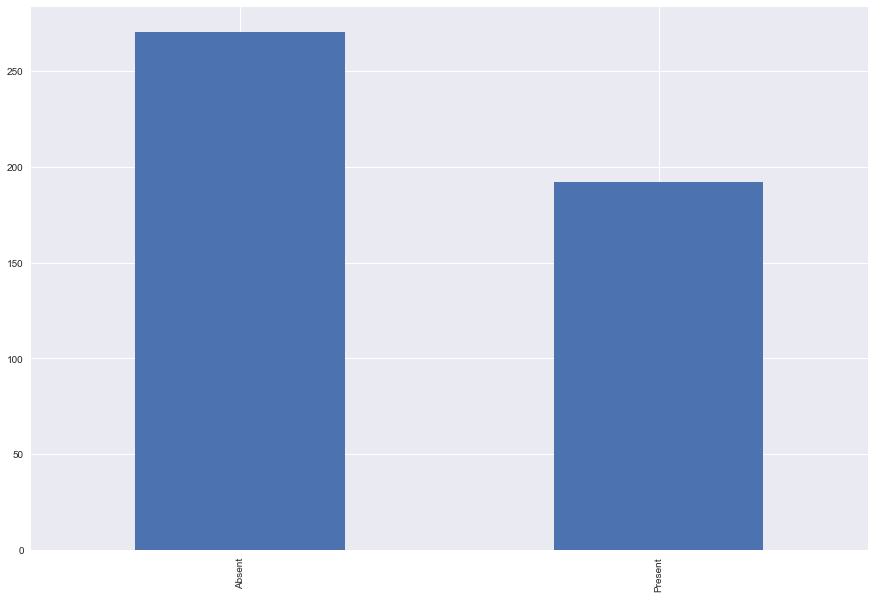

In [10]:
plt.figure(figsize=(15,10))
df['famhist'].value_counts().plot(kind= 'bar')

In [11]:
df.corr()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,OBJETIVO
sbp,1.000000,0.212247,0.158296,0.356500,-0.057454,0.238067,0.140096,0.388771,0.192354
tobacco,0.212247,1.000000,0.158905,0.286640,-0.014608,0.124529,0.200813,0.450330,0.299718
ldl,0.158296,0.158905,1.000000,0.440432,0.044048,0.330506,-0.033403,0.311799,0.263053
adiposity,0.356500,0.286640,0.440432,1.000000,-0.043144,0.716556,0.100330,0.625954,0.254121
typea,-0.057454,-0.014608,0.044048,-0.043144,1.000000,0.074006,0.039498,-0.102606,0.103156
obesity,0.238067,0.124529,0.330506,0.716556,0.074006,1.000000,0.051620,0.291777,0.100095
alcohol,0.140096,0.200813,-0.033403,0.100330,0.039498,0.051620,1.000000,0.101125,0.062531
age,0.388771,0.450330,0.311799,0.625954,-0.102606,0.291777,0.101125,1.000000,0.372973
OBJETIVO,0.192354,0.299718,0.263053,0.254121,0.103156,0.100095,0.062531,0.372973,1.000000


#### Desafío 2
A continuación se presenta el siguiente modelo a estimar:

$$  log \left(\dfrac{Pr(chd = 1)}{1 - Pr(chd = 1)} \right)= \beta_0 + \beta_1 \times famhist$$

In [12]:
df['famhist'] = df['famhist'].replace(['Absent', 'Present'], [0, 1])

In [13]:
df['famhist'].value_counts()

0    270
1    192
Name: famhist, dtype: int64

In [14]:
model_1 = smf.logit('OBJETIVO ~ famhist', df).fit()

Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5


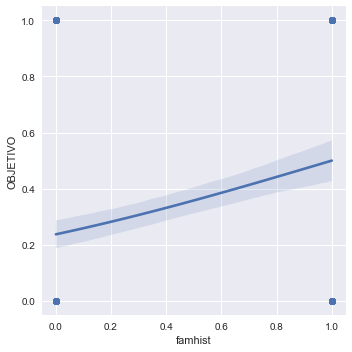

In [15]:
sns.lmplot('famhist', 'OBJETIVO', df, logistic=True)

<AxesSubplot:>

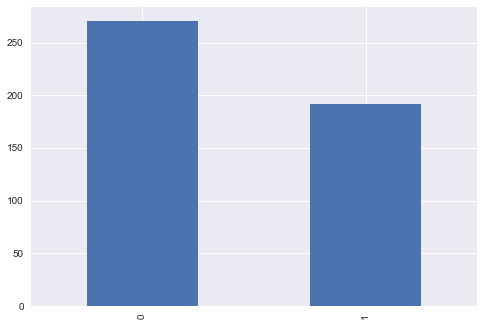

In [16]:
df.famhist.value_counts().plot(kind= 'bar')

In [17]:
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.057     
Dependent Variable: OBJETIVO         AIC:              565.8944  
Date:               2022-09-21 20:27 BIC:              574.1655  
No. Observations:   462              Log-Likelihood:   -280.95   
Df Model:           1                LL-Null:          -298.05   
Df Residuals:       460              LLR p-value:      4.9371e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -1.1690    0.1431  -8.1687  0.0000  -1.4495  -0.8885
famhist        1.1690    0.2033   5.7514  0.0000   0.7706   1.5674
=================================================================

"""

In [18]:
def inverse_logit(x):
        return 1 / (1 + np.exp(-x))

In [19]:
prob_famhist = inverse_logit(model_1.params['Intercept'] +model_1.params['famhist'] * 1)
prob_intercept = inverse_logit(model_1.params['Intercept'])
print(f'La probabilidad de tener una enfermedad es de {prob_famhist}, cuando existe antecedentes familiares')
print(f'La probabilidad de tener una enfermedad es de {round(prob_intercept,2)}, cuando no existen antecedentes familiares')
print(f'Un individuo con antecedentes familiares tiene  {round(prob_famhist - prob_intercept,2)} mas de tener enfermedades cardiácas')

La probabilidad de tener una enfermedad es de 0.5, cuando existe antecedentes familiares
La probabilidad de tener una enfermedad es de 0.24, cuando no existen antecedentes familiares
Un individuo con antecedentes familiares tiene  0.26 mas de tener enfermedades cardiácas


In [20]:
model_1_lpm = smf.ols('OBJETIVO ~ famhist',df).fit() 
model_1_lpm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.072   
Dependent Variable: OBJETIVO         AIC:                593.1725
Date:               2022-09-21 20:27 BIC:                601.4437
No. Observations:   462              Log-Likelihood:     -294.59 
Df Model:           1                F-statistic:        36.86   
Df Residuals:       460              Prob (F-statistic): 2.66e-09
R-squared:          0.074            Scale:              0.21050 
-------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     0.2370     0.0279   8.4893   0.0000   0.1822   0.2919
famhist       0.2630     0.0433   6.0713   0.0000   0.1778   0.3481
-----------------------------------------------------------------
Omnibus:             768.898       Durbin-Watson:          1.961 
Prob(Omnibus):       0.000         Jarque-Bera (JB):       58.778
Skew:                0.579         Prob(JB):               0.000 
Kurtosis:            1.692         Condition No.:          2     
=================================================================

"""

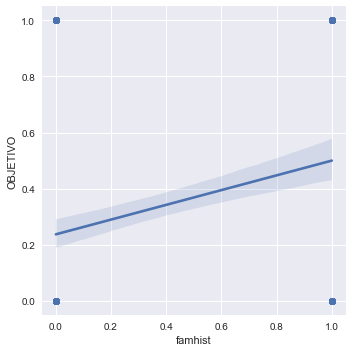

In [21]:
sns.lmplot('famhist', 'OBJETIVO', df)

### Desafío 3: Estimación completa
Implemente un modelo con la siguiente forma:

$$  log \left(\dfrac{Pr(chd = 1)}{1 - Pr(chd = 1)} \right)= \beta_0 + \sum_{i=1}^{N} \beta_i \times X$$

* Depure el modelo manteniendo las variables con significancia estadística al 5%.
* Compare los estadísticos de bondad de ajuste entre ambos.
* Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria.

In [22]:
model_2 = smf.logit('OBJETIVO ~ sbp + tobacco + ldl + adiposity + famhist + typea + obesity + alcohol + age', df).fit()
model_2.summary2()

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.208     
Dependent Variable: OBJETIVO         AIC:              492.1400  
Date:               2022-09-21 20:27 BIC:              533.4957  
No. Observations:   462              Log-Likelihood:   -236.07   
Df Model:           9                LL-Null:          -298.05   
Df Residuals:       452              LLR p-value:      2.0548e-22
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -6.1507    1.3083  -4.7015  0.0000  -8.7149  -3.5866
sbp            0.0065    0.0057   1.1350  0.2564  -0.0047   0.0177
tobacco        0.0794    0.0266   2.9838  0.0028   0.0272   0.1315
ldl            0.1739    0.0597   2.9152  0.0036   0.0570   0.2909
adiposity      0.0186    0.0293   0.6346  0.5257  -0.0388   0.0760
famhist        0.9254    0.2279   4.0605  0.0000   0.4787   1.3720
typea          0.0396    0.0123   3.2138  0.0013   0.0154   0.0637
obesity       -0.0629    0.0442  -1.4218  0.1551  -0.1496   0.0238
alcohol        0.0001    0.0045   0.0271  0.9784  -0.0087   0.0089
age            0.0452    0.0121   3.7285  0.0002   0.0215   0.0690
=================================================================

"""

In [23]:
model__depurado = smf.logit('OBJETIVO ~ tobacco + ldl + famhist + typea + age', df).fit()
model__depurado.summary2()

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.202     
Dependent Variable: OBJETIVO         AIC:              487.6856  
Date:               2022-09-21 20:27 BIC:              512.4990  
No. Observations:   462              Log-Likelihood:   -237.84   
Df Model:           5                LL-Null:          -298.05   
Df Residuals:       456              LLR p-value:      2.5537e-24
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -6.4464    0.9209  -7.0004  0.0000  -8.2513  -4.6416
tobacco        0.0804    0.0259   3.1057  0.0019   0.0297   0.1311
ldl            0.1620    0.0550   2.9470  0.0032   0.0543   0.2697
famhist        0.9082    0.2258   4.0228  0.0001   0.4657   1.3507
typea          0.0371    0.0122   3.0505  0.0023   0.0133   0.0610
age            0.0505    0.0102   4.9442  0.0000   0.0305   0.0705
=================================================================

"""

In [24]:
model_3 = smf.logit('OBJETIVO ~ tobacco + ldl + famhist + typea + age', df).fit()
model_3.summary2()

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.202     
Dependent Variable: OBJETIVO         AIC:              487.6856  
Date:               2022-09-21 20:27 BIC:              512.4990  
No. Observations:   462              Log-Likelihood:   -237.84   
Df Model:           5                LL-Null:          -298.05   
Df Residuals:       456              LLR p-value:      2.5537e-24
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -6.4464    0.9209  -7.0004  0.0000  -8.2513  -4.6416
tobacco        0.0804    0.0259   3.1057  0.0019   0.0297   0.1311
ldl            0.1620    0.0550   2.9470  0.0032   0.0543   0.2697
famhist        0.9082    0.2258   4.0228  0.0001   0.4657   1.3507
typea          0.0371    0.0122   3.0505  0.0023   0.0133   0.0610
age            0.0505    0.0102   4.9442  0.0000   0.0305   0.0705
=================================================================

"""

In [25]:
model__depurado.params[ 'ldl' ]

0.16199163569651684

### Desafío 4: Estimación de perfiles
A partir del modelo depurado, genere las estimaciones en log-odds y posteriormente transfórmelas a probabilidades con inverse_logit. Los perfiles a estimar son los siguientes:
* La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra.
* La probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.
* La probabilidad de tener una enfermedad coronaria para un individuo con bajos
niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes


In [26]:
def parammean(variable, dataframe=df, model=model__depurado):
        return  model.params[variable] * dataframe[variable].mean()

In [27]:
model__depurado.params[ 'ldl' ]

0.16199163569651684

In [28]:
pr_profile_mean = model__depurado.params[ 'Intercept' ] + parammean( 'tobacco' ) +parammean( 'ldl' ) + parammean( 'typea' ) + parammean( 'age' )+parammean( 'famhist' ) 

In [29]:
print(f'La probabilidad de tener una enfermedad coronaria es de {inverse_logit(pr_profile_mean)}, para un individuo con características similares a la muestra')

La probabilidad de tener una enfermedad coronaria es de 0.29370927481586934, para un individuo con características similares a la muestra


In [30]:
df.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,OBJETIVO
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


In [31]:
pr_profile_ldl_max = model__depurado.params[ 'Intercept' ] + parammean( 'tobacco') +model__depurado.params[ 'ldl' ] * df[ 'ldl' ].max() + parammean( 'typea' ) + parammean( 'age' ) + parammean( 'famhist' )

In [32]:
print(f'La probabilidad de tener una enfermedad coronaria es de {inverse_logit(pr_profile_ldl_max)}, para un individuo con altos niveles de lipoproteína de baja densidad')

La probabilidad de tener una enfermedad coronaria es de 0.6980443104466213, para un individuo con altos niveles de lipoproteína de baja densidad


In [33]:
pr_profile_ldl_min =model__depurado.params[ 'Intercept' ] + parammean( 'tobacco') +model__depurado.params[ 'ldl' ] * df[ 'ldl' ].min() + parammean( 'typea' ) + parammean( 'age' ) + parammean( 'famhist' )

In [34]:
print(f'La probabilidad de tener una enfermedad coronaria es de {inverse_logit(pr_profile_ldl_min)}, para un individuo con bajos niveles de lipoproteína de baja densidad')

La probabilidad de tener una enfermedad coronaria es de 0.1844359557540466, para un individuo con bajos niveles de lipoproteína de baja densidad
